In [96]:
# Hans D. Escobar H.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [97]:
raw_df = pd.read_csv("../Private_Data/e_guineensis.csv")
raw_df.head(n=3)

,Cultivar,WATERPOT,PROLINE,TOTSUG,REDSUG,ABA,PH4AM,PH9AM,PHOTO,TRANS,WUE
0,IRHO_1001,-0.05MPa,0.166059,43.392402,2.507559,1.765338,-0.29,-1.898571,10.865284,1.585046,6.854869
1,IRHO_1001,-0.05MPa,0.176059,66.962402,3.157559,2.285338,-0.25,-1.708571,11.665284,2.195046,5.314368
2,IRHO_1001,-0.05MPa,0.186059,90.532402,3.807559,2.805338,-0.21,-1.518571,12.465284,2.805046,4.443878


In [98]:
raw_df.groupby(["Cultivar", "WATERPOT"]).agg(["mean", "std"])

PROLINE            TOTSUG            REDSUG        \
                        mean   std        mean    std       mean   std   
Cultivar  WATERPOT                                                       
IRHO_1001 -0.05MPa  0.176059  0.01   66.962402  23.57   3.157559  0.65   
          -0.5MPa   0.156376  0.03  157.903870  26.03   3.321435  0.55   
          -1MPa     0.159285  0.03  209.042887  28.00   4.406431  1.77   
          -2MPa     0.174471  0.01  133.596673   6.30   3.545957  1.48   
IRHO_7001 -0.05MPa  0.175110  0.03   55.301637  20.59   3.178507  0.50   
          -0.5MPa   0.188718  0.01  107.076863  27.94   3.638478  0.68   
          -1MPa     0.198136  0.01  260.025903  14.34   3.239041  0.46   
          -2MPa     0.197847  0.01  369.497961  39.02   3.029776  0.74   
U_1076    -0.05MPa  0.229167  0.06   71.943528   3.30   6.933583  1.96   
          -0.5MPa   0.392193  0.05  105.645250   5.59  13.888194  3.54   
          -1MPa     0.551480  0.10  193.322340   7.82  20.065512  3.86   
          -2MPa     0.721983  0.19  288.524212  13.14  28.336917  4.47   
U_1080    -0.05MPa  0.233216  0.04   50.557659   3.72  12.896312  2.98   
          -0.5MPa   0.364456  0.03   76.018032   4.11  18.476031  5.75   
          -1MPa     0.493594  0.01  155.348294   7.05  28.319917  3.18   
          -2MPa     0.832656  0.04  225.879626  10.05  33.368310  3.62   

                          ABA            PH4AM           PH9AM        \
                         mean    std      mean   std      mean   std   
Cultivar  WATERPOT                                                     
IRHO_1001 -0.05MPa   2.285338   0.52 -0.250000  0.04 -1.708571  0.19   
          -0.5MPa    6.132083   2.98 -0.516667  0.03 -1.678571  0.14   
          -1MPa     26.779619   9.52 -0.366667  0.03 -1.964286  0.29   
          -2MPa     61.424166  14.96 -1.066667  0.06 -1.528571  0.17   
IRHO_7001 -0.05MPa   1.879399   1.12 -0.233333  0.03 -1.771429  0.18   
          -0.5MPa   10.464599   3.64 -0.466667  0.03 -1.714286  0.19   
          -1MPa     43.879049   3.34 -0.416667  0.03 -1.814286  0.13   
          -2MPa     74.835154   9.09 -0.433333  0.03 -1.650000  0.27   
U_1076    -0.05MPa   0.142150   0.02 -0.100000  0.01 -1.500000  0.01   
          -0.5MPa    0.530687   0.08 -0.075000  0.04 -1.450000  0.08   
          -1MPa     10.009281   6.99 -1.050000  0.22 -2.100000  0.01   
          -2MPa     41.178595   3.01 -2.400000  0.08 -2.300000  0.15   
U_1080    -0.05MPa   0.151899   0.01 -0.050000  0.01 -1.450000  0.08   
          -0.5MPa    0.501691   0.08 -0.100000  0.01 -1.500000  0.01   
          -1MPa      5.462601   0.67 -0.650000  0.08 -2.100000  0.01   
          -2MPa     24.338608   5.43 -2.500000  0.08 -1.950000  0.01   

                        PHOTO           TRANS                 WUE            
                         mean   std      mean       std      mean       std  
Cultivar  WATERPOT                                                           
IRHO_1001 -0.05MPa  11.665284  0.80  2.195046  0.610000  5.537705  1.220913  
          -0.5MPa    7.140104  0.99  1.307867  0.360000  5.607357  0.816615  
          -1MPa      3.461538  1.32  0.918100  0.390000  3.826944  0.205847  
          -2MPa      1.478985  0.41  0.555613  0.196509  2.717522  0.242263  
IRHO_7001 -0.05MPa  10.977227  0.90  2.312864  0.580000  4.889043  0.863540  
          -0.5MPa    8.933114  1.13  1.424879  0.440000  6.529390  1.282837  
          -1MPa      6.666167  2.42  1.362134  0.510000  4.910146  0.066705  
          -2MPa      3.501031  1.01  0.858211  0.094852  4.025203  0.738291  
U_1076    -0.05MPa  11.817873  1.30  2.760294  0.140000  4.272777  0.254580  
          -0.5MPa    7.742341  1.08  1.821635  0.350000  4.279972  0.233742  
          -1MPa      3.097026  0.80  0.937945  0.170000  3.270135  0.264543  
          -2MPa      2.540123  0.12  0.767335  0.100000  3.334625  0.280561  
U_1080    -0.05MPa  12.994525  0.50  3.009425  0.220000  4.325269  0.150450

In [99]:
def twoway_anova(dataframe):
    variables_to_check = [
        "PROLINE",
        "TOTSUG",
        "REDSUG",
        "ABA",
        "PH4AM",
        "PH9AM",
        "PHOTO",
        "TRANS",
        "WUE",
    ]
    for variable_name in variables_to_check:
        print("Variable {}:".format(variable_name))
        model = ols(
            "{} ~ C(Cultivar) + C(WATERPOT) + C(Cultivar):C(WATERPOT)".format(
                variable_name
            ),
            data=dataframe,
        ).fit()
        result = sm.stats.anova_lm(model, type=2)
        display(result)

In [100]:
twoway_anova(raw_df)

Variable PROLINE:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,1.077082,0.359027,96.383218,4.151276e-16
C(WATERPOT),3.0,0.509263,0.169754,45.571651,1.174143e-11
C(Cultivar):C(WATERPOT),9.0,0.491521,0.054613,14.661318,4.846020e-09
Residual,32.0,0.119200,0.003725,NaN,NaN


Variable TOTSUG:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,34428.934953,11476.311651,33.710672,5.042640e-10
C(WATERPOT),3.0,275561.519526,91853.839842,269.812700,8.681932e-23
C(Cultivar):C(WATERPOT),9.0,83249.481443,9249.942383,27.170905,1.533826e-12
Residual,32.0,10893.938198,340.435569,NaN,NaN


Variable REDSUG:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,3619.175676,1206.391892,155.747247,3.634124e-19
C(WATERPOT),3.0,769.950509,256.650170,33.133974,6.204582e-10
C(Cultivar):C(WATERPOT),9.0,753.349265,83.705474,10.806519,1.750136e-07
Residual,32.0,247.866600,7.745831,NaN,NaN


Variable ABA:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,4578.544148,1526.181383,46.983117,7.918224e-12
C(WATERPOT),3.0,18329.016702,6109.672234,188.084753,2.131703e-20
C(Cultivar):C(WATERPOT),9.0,2845.058214,316.117579,9.731602,5.571249e-07
Residual,32.0,1039.475600,32.483613,NaN,NaN


Variable PH4AM:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,2.088164,0.696055,139.037141,1.968550e-18
C(WATERPOT),3.0,15.285664,5.095221,1017.772056,8.240648e-32
C(Cultivar):C(WATERPOT),9.0,8.654701,0.961633,192.086570,2.961629e-25
Residual,32.0,0.160200,0.005006,NaN,NaN


Variable PH9AM:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,0.098475,0.032825,1.447630,2.472973e-01
C(WATERPOT),3.0,1.417434,0.472478,20.836960,1.137146e-07
C(Cultivar):C(WATERPOT),9.0,1.508420,0.167602,7.391498,9.530977e-06
Residual,32.0,0.725600,0.022675,NaN,NaN


Variable PHOTO:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,16.808435,5.602812,4.926794,6.326079e-03
C(WATERPOT),3.0,643.120130,214.373377,188.507756,2.060526e-20
C(Cultivar):C(WATERPOT),9.0,32.232073,3.581341,3.149228,7.851087e-03
Residual,32.0,36.390800,1.137212,NaN,NaN


Variable TRANS:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,0.889873,0.296624,2.437448,8.262682e-02
C(WATERPOT),3.0,23.654230,7.884743,64.791252,1.093108e-13
C(Cultivar):C(WATERPOT),9.0,1.874594,0.208288,1.711566,1.270265e-01
Residual,32.0,3.894226,0.121695,NaN,NaN


Variable WUE:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,14.010437,4.670146,13.492534,7.360523e-06
C(WATERPOT),3.0,27.904227,9.301409,26.872734,7.137536e-09
C(Cultivar):C(WATERPOT),9.0,7.284204,0.809356,2.338313,3.729952e-02
Residual,32.0,11.076100,0.346128,NaN,NaN


In [101]:
def oneway_anova_tukey(filtered_df):
    variables_to_check = [
        "PROLINE",
        "TOTSUG",
        "REDSUG",
        "ABA",
        "PH4AM",
        "PH9AM",
        "PHOTO",
        "TRANS",
        "WUE",
    ]
    for variable_name in variables_to_check:
        print("Variable {}:".format(variable_name))
        model = ols("{} ~ Cultivar".format(variable_name), data=filtered_df).fit()
        anova_result = sm.stats.anova_lm(model, typ=2)
        display(anova_result)

        tukey = pairwise_tukeyhsd(
            endog=filtered_df[variable_name], groups=filtered_df["Cultivar"], alpha=0.05
        )
        display(tukey.summary())

In [102]:
for waterpot_grp in raw_df["WATERPOT"].unique():
    print(
        "\n-----------------------------------------\n\
        WATERPOT: {}".format(
            waterpot_grp
        )
    )
    oneway_anova_tukey(
        raw_df.iloc[raw_df.groupby("WATERPOT").groups[waterpot_grp]][
            ["Cultivar"] + interest_names
        ]
    )


-----------------------------------------
        WATERPOT: -0.05MPa
Variable PROLINE:


,sum_sq,df,F,PR(>F)
Cultivar,0.009302,3.0,2.000495,0.192585
Residual,0.012400,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.0009,1.0,-0.1039,0.102,False
IRHO_1001,U_1076,0.0531,0.4051,-0.0498,0.156,False
IRHO_1001,U_1080,0.0572,0.3489,-0.0458,0.1601,False
IRHO_7001,U_1076,0.0541,0.3914,-0.0489,0.157,False
IRHO_7001,U_1080,0.0581,0.3365,-0.0448,0.161,False
U_1076,U_1080,0.004,0.9992,-0.0989,0.107,False


Variable TOTSUG:


,sum_sq,df,F,PR(>F)
Cultivar,890.035401,3.0,1.181725,0.375943
Residual,2008.442800,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-11.6608,0.8047,-53.0901,29.7686,False
IRHO_1001,U_1076,4.9811,0.9793,-36.4482,46.4105,False
IRHO_1001,U_1080,-16.4047,0.6055,-57.8341,25.0246,False
IRHO_7001,U_1076,16.6419,0.5953,-24.7875,58.0712,False
IRHO_7001,U_1080,-4.744,0.982,-46.1733,36.6854,False
U_1076,U_1080,-21.3859,0.4046,-62.8152,20.0435,False


Variable REDSUG:


,sum_sq,df,F,PR(>F)
Cultivar,189.894443,3.0,18.902728,0.000546
Residual,26.789000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.0209,1.0,-4.7638,4.8057,False
IRHO_1001,U_1076,3.776,0.1294,-1.0087,8.5607,False
IRHO_1001,U_1080,9.7388,0.0008,4.954,14.5235,True
IRHO_7001,U_1076,3.7551,0.132,-1.0296,8.5398,False
IRHO_7001,U_1080,9.7178,0.0008,4.9331,14.5025,True
U_1076,U_1080,5.9627,0.0169,1.178,10.7475,True


Variable ABA:


,sum_sq,df,F,PR(>F)
Cultivar,11.483989,3.0,10.038671,0.004355
Residual,3.050600,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.4059,0.8504,-2.0206,1.2087,False
IRHO_1001,U_1076,-2.1432,0.0119,-3.7578,-0.5286,True
IRHO_1001,U_1080,-2.1334,0.0122,-3.7481,-0.5188,True
IRHO_7001,U_1076,-1.7372,0.0356,-3.3519,-0.1226,True
IRHO_7001,U_1080,-1.7275,0.0365,-3.3421,-0.1129,True
U_1076,U_1080,0.0097,1.0,-1.6049,1.6244,False


Variable PH4AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.0875,3.0,43.209876,0.000027
Residual,0.0054,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.0167,0.859,-0.0513,0.0846,False
IRHO_1001,U_1076,0.15,0.0005,0.0821,0.2179,True
IRHO_1001,U_1080,0.2,0.0001,0.1321,0.2679,True
IRHO_7001,U_1076,0.1333,0.0011,0.0654,0.2013,True
IRHO_7001,U_1080,0.1833,0.0001,0.1154,0.2513,True
U_1076,U_1080,0.05,0.1638,-0.0179,0.1179,False


Variable PH9AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.220352,3.0,3.917361,0.054385
Residual,0.150000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.0629,0.9405,-0.4209,0.2952,False
IRHO_1001,U_1076,0.2086,0.3133,-0.1495,0.5666,False
IRHO_1001,U_1080,0.2586,0.174,-0.0995,0.6166,False
IRHO_7001,U_1076,0.2714,0.1486,-0.0866,0.6295,False
IRHO_7001,U_1080,0.3214,0.0794,-0.0366,0.6795,False
U_1076,U_1080,0.05,0.9683,-0.308,0.408,False


Variable PHOTO:


,sum_sq,df,F,PR(>F)
Cultivar,6.318207,3.0,2.485037,0.134901
Residual,6.780000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.6881,0.7977,-3.0952,1.719,False
IRHO_1001,U_1076,0.1526,0.9968,-2.2545,2.5597,False
IRHO_1001,U_1080,1.3292,0.353,-1.0779,3.7363,False
IRHO_7001,U_1076,0.8406,0.6893,-1.5664,3.2477,False
IRHO_7001,U_1080,2.0173,0.1039,-0.3898,4.4244,False
U_1076,U_1080,1.1767,0.4469,-1.2304,3.5837,False


Variable TRANS:


,sum_sq,df,F,PR(>F)
Cultivar,1.308042,3.0,2.246048,0.160231
Residual,1.553000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.1178,0.987,-1.0342,1.2698,False
IRHO_1001,U_1076,0.5652,0.444,-0.5868,1.7173,False
IRHO_1001,U_1080,0.8144,0.186,-0.3377,1.9664,False
IRHO_7001,U_1076,0.4474,0.6191,-0.7046,1.5995,False
IRHO_7001,U_1080,0.6966,0.2866,-0.4555,1.8486,False
U_1076,U_1080,0.2491,0.8971,-0.9029,1.4012,False


Variable WUE:


,sum_sq,df,F,PR(>F)
Cultivar,3.143391,3.0,1.803611,0.224404
Residual,4.647552,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.6487,0.7311,-2.6416,1.3443,False
IRHO_1001,U_1076,-1.2649,0.2531,-3.2579,0.728,False
IRHO_1001,U_1080,-1.2124,0.2822,-3.2054,0.7805,False
IRHO_7001,U_1076,-0.6163,0.759,-2.6092,1.3767,False
IRHO_7001,U_1080,-0.5638,0.8024,-2.5567,1.4291,False
U_1076,U_1080,0.0525,0.9998,-1.9404,2.0454,False



-----------------------------------------
        WATERPOT: -0.5MPa
Variable PROLINE:


,sum_sq,df,F,PR(>F)
Cultivar,0.129756,3.0,39.320128,0.000039
Residual,0.008800,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.0323,0.6468,-0.0544,0.1191,False
IRHO_1001,U_1076,0.2358,0.0001,0.1491,0.3225,True
IRHO_1001,U_1080,0.2081,0.0003,0.1214,0.2948,True
IRHO_7001,U_1076,0.2035,0.0003,0.1168,0.2902,True
IRHO_7001,U_1080,0.1757,0.0009,0.089,0.2625,True
U_1076,U_1080,-0.0277,0.7409,-0.1145,0.059,False


Variable TOTSUG:


,sum_sq,df,F,PR(>F)
Cultivar,10398.083351,3.0,9.20381,0.005675
Residual,3012.689398,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-50.827,0.0496,-101.5676,-0.0864,True
IRHO_1001,U_1076,-52.2586,0.0437,-102.9992,-1.518,True
IRHO_1001,U_1080,-81.8858,0.0038,-132.6264,-31.1452,True
IRHO_7001,U_1076,-1.4316,0.9997,-52.1722,49.309,False
IRHO_7001,U_1080,-31.0588,0.2779,-81.7994,19.6818,False
U_1076,U_1080,-29.6272,0.3116,-80.3678,21.1134,False


Variable REDSUG:


,sum_sq,df,F,PR(>F)
Cultivar,515.757466,3.0,14.833724,0.001243
Residual,92.718000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.317,0.9994,-8.5844,9.2185,False
IRHO_1001,U_1076,10.5668,0.0218,1.6653,19.4682,True
IRHO_1001,U_1080,15.1546,0.0027,6.2532,24.056,True
IRHO_7001,U_1076,10.2497,0.0255,1.3483,19.1512,True
IRHO_7001,U_1080,14.8376,0.0031,5.9361,23.739,True
U_1076,U_1080,4.5878,0.4058,-4.3136,13.4893,False


Variable ABA:


,sum_sq,df,F,PR(>F)
Cultivar,209.842985,3.0,12.635739,0.002105
Residual,44.285600,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,4.3325,0.1882,-1.8194,10.4844,False
IRHO_1001,U_1076,-5.6014,0.0749,-11.7533,0.5505,False
IRHO_1001,U_1080,-5.6304,0.0733,-11.7823,0.5215,False
IRHO_7001,U_1076,-9.9339,0.0038,-16.0858,-3.782,True
IRHO_7001,U_1080,-9.9629,0.0037,-16.1148,-3.811,True
U_1076,U_1080,-0.029,1.0,-6.1809,6.1229,False


Variable PH4AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.49474,3.0,188.472223,9.271324e-08
Residual,0.00700,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.05,0.241,-0.0273,0.1273,False
IRHO_1001,U_1076,0.4417,0.0,0.3643,0.519,True
IRHO_1001,U_1080,0.4167,0.0,0.3393,0.494,True
IRHO_7001,U_1076,0.3917,0.0,0.3143,0.469,True
IRHO_7001,U_1080,0.3667,0.0,0.2893,0.444,True
U_1076,U_1080,-0.025,0.735,-0.1023,0.0523,False


Variable PH9AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.152755,3.0,3.274493,0.079839
Residual,0.124400,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.0357,0.9841,-0.3618,0.2903,False
IRHO_1001,U_1076,0.2286,0.1909,-0.0975,0.5546,False
IRHO_1001,U_1080,0.1786,0.3592,-0.1475,0.5046,False
IRHO_7001,U_1076,0.2643,0.1176,-0.0618,0.5903,False
IRHO_7001,U_1080,0.2143,0.2303,-0.1118,0.5403,False
U_1076,U_1080,-0.05,0.9589,-0.3761,0.2761,False


Variable PHOTO:


,sum_sq,df,F,PR(>F)
Cultivar,5.056678,3.0,1.716674,0.240461
Residual,7.855000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,1.793,0.1984,-0.7979,4.3839,False
IRHO_1001,U_1076,0.6022,0.8766,-1.9887,3.1931,False
IRHO_1001,U_1080,0.6335,0.8601,-1.9574,3.2244,False
IRHO_7001,U_1076,-1.1908,0.4947,-3.7817,1.4001,False
IRHO_7001,U_1080,-1.1595,0.5151,-3.7504,1.4314,False
U_1076,U_1080,0.0313,1.0,-2.5596,2.6222,False


Variable TRANS:


,sum_sq,df,F,PR(>F)
Cultivar,0.582066,3.0,1.695255,0.244627
Residual,0.915600,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.117,0.9728,-0.7676,1.0016,False
IRHO_1001,U_1076,0.5138,0.3155,-0.3708,1.3983,False
IRHO_1001,U_1080,0.4659,0.3892,-0.4187,1.3504,False
IRHO_7001,U_1076,0.3968,0.5134,-0.4878,1.2813,False
IRHO_7001,U_1080,0.3489,0.6084,-0.5357,1.2334,False
U_1076,U_1080,-0.0479,0.998,-0.9325,0.8367,False


Variable WUE:


,sum_sq,df,F,PR(>F)
Cultivar,10.369401,3.0,5.799867,0.020935
Residual,4.767649,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.922,0.4994,-1.0965,2.9405,False
IRHO_1001,U_1076,-1.3274,0.2299,-3.3459,0.6911,False
IRHO_1001,U_1080,-1.23,0.2811,-3.2485,0.7885,False
IRHO_7001,U_1076,-2.2494,0.03,-4.2679,-0.2309,True
IRHO_7001,U_1080,-2.1521,0.0372,-4.1706,-0.1336,True
U_1076,U_1080,0.0973,0.9986,-1.9212,2.1159,False



-----------------------------------------
        WATERPOT: -1MPa
Variable PROLINE:


,sum_sq,df,F,PR(>F)
Cultivar,0.36194,3.0,43.476223,0.000027
Residual,0.02220,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.0389,0.8038,-0.0989,0.1766,False
IRHO_1001,U_1076,0.3922,0.0001,0.2545,0.5299,True
IRHO_1001,U_1080,0.3343,0.0002,0.1966,0.472,True
IRHO_7001,U_1076,0.3533,0.0002,0.2156,0.4911,True
IRHO_7001,U_1080,0.2955,0.0006,0.1577,0.4332,True
U_1076,U_1080,-0.0579,0.5624,-0.1956,0.0799,False


Variable TOTSUG:


,sum_sq,df,F,PR(>F)
Cultivar,16933.730881,3.0,20.516586,0.00041
Residual,2200.981000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,50.983,0.0229,7.6133,94.3527,True
IRHO_1001,U_1076,-15.7205,0.6656,-59.0903,27.6492,False
IRHO_1001,U_1080,-53.6946,0.0175,-97.0643,-10.3249,True
IRHO_7001,U_1076,-66.7036,0.0051,-110.0733,-23.3338,True
IRHO_7001,U_1080,-104.6776,0.0003,-148.0473,-61.3079,True
U_1076,U_1080,-37.974,0.0877,-81.3438,5.3957,False


Variable REDSUG:


,sum_sq,df,F,PR(>F)
Cultivar,1349.055157,3.0,63.433083,0.000006
Residual,56.713000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-1.1674,0.9475,-8.1292,5.7944,False
IRHO_1001,U_1076,15.6591,0.0004,8.6973,22.6209,True
IRHO_1001,U_1080,23.9135,0.0,16.9517,30.8753,True
IRHO_7001,U_1076,16.8265,0.0003,9.8647,23.7882,True
IRHO_7001,U_1080,25.0809,0.0,18.1191,32.0426,True
U_1076,U_1080,8.2544,0.0219,1.2926,15.2162,True


Variable ABA:


,sum_sq,df,F,PR(>F)
Cultivar,2753.780282,3.0,24.300652,0.000226
Residual,302.190000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,17.0994,0.0375,1.0293,33.1695,True
IRHO_1001,U_1076,-16.7703,0.0411,-32.8404,-0.7002,True
IRHO_1001,U_1080,-21.317,0.012,-37.3871,-5.2469,True
IRHO_7001,U_1076,-33.8698,0.0007,-49.9399,-17.7997,True
IRHO_7001,U_1080,-38.4164,0.0003,-54.4865,-22.3464,True
U_1076,U_1080,-4.5467,0.8024,-20.6168,11.5234,False


Variable PH4AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.873958,3.0,20.587947,0.000406
Residual,0.113200,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.05,0.9532,-0.361,0.261,False
IRHO_1001,U_1076,-0.6833,0.0005,-0.9944,-0.3723,True
IRHO_1001,U_1080,-0.2833,0.0748,-0.5944,0.0277,False
IRHO_7001,U_1076,-0.6333,0.0008,-0.9444,-0.3223,True
IRHO_7001,U_1080,-0.2333,0.1539,-0.5444,0.0777,False
U_1076,U_1080,0.4,0.0142,0.089,0.711,True


Variable PH9AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.166952,3.0,2.199625,0.165807
Residual,0.202400,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.15,0.6688,-0.2659,0.5659,False
IRHO_1001,U_1076,-0.1357,0.7296,-0.5516,0.2802,False
IRHO_1001,U_1080,-0.1357,0.7296,-0.5516,0.2802,False
IRHO_7001,U_1076,-0.2857,0.2028,-0.7016,0.1302,False
IRHO_7001,U_1080,-0.2857,0.2028,-0.7016,0.1302,False
U_1076,U_1080,0.0,1.0,-0.4159,0.4159,False


Variable PHOTO:


,sum_sq,df,F,PR(>F)
Cultivar,31.473344,3.0,5.066397,0.029591
Residual,16.565800,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,3.2046,0.0977,-0.5579,6.9672,False
IRHO_1001,U_1076,-0.3645,0.9889,-4.1271,3.3981,False
IRHO_1001,U_1080,-0.9776,0.838,-4.7402,2.7849,False
IRHO_7001,U_1076,-3.5691,0.0631,-7.3317,0.1934,False
IRHO_7001,U_1080,-4.1823,0.0304,-7.9448,-0.4197,True
U_1076,U_1080,-0.6131,0.9514,-4.3757,3.1494,False


Variable TRANS:


,sum_sq,df,F,PR(>F)
Cultivar,0.697382,3.0,2.096128,0.179115
Residual,0.887200,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.444,0.4141,-0.4267,1.3148,False
IRHO_1001,U_1076,0.0198,0.9998,-0.8509,0.8906,False
IRHO_1001,U_1080,-0.2224,0.8445,-1.0932,0.6483,False
IRHO_7001,U_1076,-0.4242,0.4496,-1.2949,0.4466,False
IRHO_7001,U_1080,-0.6665,0.1439,-1.5372,0.2043,False
U_1076,U_1080,-0.2423,0.8098,-1.113,0.6285,False


Variable WUE:


,sum_sq,df,F,PR(>F)
Cultivar,4.596969,3.0,51.559806,0.000014
Residual,0.237755,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,1.0832,0.0003,0.6324,1.534,True
IRHO_1001,U_1076,-0.5568,0.0177,-1.0076,-0.1061,True
IRHO_1001,U_1080,-0.2586,0.3244,-0.7094,0.1921,False
IRHO_7001,U_1076,-1.64,0.0,-2.0908,-1.1893,True
IRHO_7001,U_1080,-1.3418,0.0001,-1.7926,-0.8911,True
U_1076,U_1080,0.2982,0.2261,-0.1526,0.7489,False



-----------------------------------------
        WATERPOT: -2MPa
Variable PROLINE:


,sum_sq,df,F,PR(>F)
Cultivar,1.067605,3.0,37.558659,0.000046
Residual,0.075800,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.0234,0.9905,-0.2311,0.2779,False
IRHO_1001,U_1076,0.5475,0.0006,0.293,0.802,True
IRHO_1001,U_1080,0.6582,0.0002,0.4037,0.9127,True
IRHO_7001,U_1076,0.5241,0.0008,0.2696,0.7787,True
IRHO_7001,U_1080,0.6348,0.0002,0.3803,0.8893,True
U_1076,U_1080,0.1107,0.5369,-0.1438,0.3652,False


Variable TOTSUG:


,sum_sq,df,F,PR(>F)
Cultivar,89456.566762,3.0,64.967923,0.000006
Residual,3671.825000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,235.9013,0.0,179.8843,291.9182,True
IRHO_1001,U_1076,154.9275,0.0001,98.9106,210.9445,True
IRHO_1001,U_1080,92.283,0.0033,36.266,148.2999,True
IRHO_7001,U_1076,-80.9737,0.0073,-136.9907,-24.9568,True
IRHO_7001,U_1080,-143.6183,0.0002,-199.6353,-87.6014,True
U_1076,U_1080,-62.6446,0.0295,-118.6615,-6.6276,True


Variable REDSUG:


,sum_sq,df,F,PR(>F)
Cultivar,2317.817875,3.0,86.268541,0.000002
Residual,71.646600,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.5162,0.9964,-8.341,7.3087,False
IRHO_1001,U_1076,24.791,0.0,16.9661,32.6158,True
IRHO_1001,U_1080,29.8224,0.0,21.9975,37.6472,True
IRHO_7001,U_1076,25.3071,0.0,17.4823,33.132,True
IRHO_7001,U_1080,30.3385,0.0,22.5137,38.1634,True
U_1076,U_1080,5.0314,0.2445,-2.7935,12.8562,False


Variable ABA:


,sum_sq,df,F,PR(>F)
Cultivar,4448.495107,3.0,17.193512,0.000756
Residual,689.949400,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,13.411,0.3529,-10.8712,37.6931,False
IRHO_1001,U_1076,-20.2456,0.106,-44.5277,4.0366,False
IRHO_1001,U_1080,-37.0856,0.0053,-61.3677,-12.8034,True
IRHO_7001,U_1076,-33.6566,0.0094,-57.9387,-9.3744,True
IRHO_7001,U_1080,-50.4965,0.0007,-74.7787,-26.2144,True
U_1076,U_1080,-16.84,0.1972,-41.1221,7.4422,False


Variable PH4AM:


,sum_sq,df,F,PR(>F)
Cultivar,9.286667,3.0,715.735389,4.665084e-10
Residual,0.034600,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.6333,0.0,0.4614,0.8053,True
IRHO_1001,U_1076,-1.3333,0.0,-1.5053,-1.1614,True
IRHO_1001,U_1080,-1.4333,0.0,-1.6053,-1.2614,True
IRHO_7001,U_1076,-1.9667,0.0,-2.1386,-1.7947,True
IRHO_7001,U_1080,-2.0667,0.0,-2.2386,-1.8947,True
U_1076,U_1080,-0.1,0.3145,-0.272,0.072,False


Variable PH9AM:


,sum_sq,df,F,PR(>F)
Cultivar,1.066837,3.0,11.434477,0.002899
Residual,0.248800,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.1214,0.8328,-0.5825,0.3397,False
IRHO_1001,U_1076,-0.7714,0.003,-1.2325,-0.3103,True
IRHO_1001,U_1080,-0.4214,0.0738,-0.8825,0.0397,False
IRHO_7001,U_1076,-0.65,0.0085,-1.1111,-0.1889,True
IRHO_7001,U_1080,-0.3,0.2368,-0.7611,0.1611,False
U_1076,U_1080,0.35,0.148,-0.1111,0.8111,False


Variable PHOTO:


,sum_sq,df,F,PR(>F)
Cultivar,6.192279,3.0,3.181646,0.084646
Residual,5.190000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,2.022,0.0599,-0.084,4.1281,False
IRHO_1001,U_1076,1.0611,0.4234,-1.0449,3.1672,False
IRHO_1001,U_1080,0.8725,0.573,-1.2336,2.9785,False
IRHO_7001,U_1076,-0.9609,0.5003,-3.0669,1.1451,False
IRHO_7001,U_1080,-1.1496,0.3618,-3.2556,0.9564,False
U_1076,U_1080,-0.1887,0.9911,-2.2947,1.9173,False


Variable TRANS:


,sum_sq,df,F,PR(>F)
Cultivar,0.176977,3.0,0.876516,0.492635
Residual,0.538426,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.3026,0.5176,-0.3757,0.9809,False
IRHO_1001,U_1076,0.2117,0.7541,-0.4666,0.8901,False
IRHO_1001,U_1080,0.2913,0.5463,-0.387,0.9696,False
IRHO_7001,U_1076,-0.0909,0.9718,-0.7692,0.5875,False
IRHO_7001,U_1080,-0.0113,0.9999,-0.6896,0.667,False
U_1076,U_1080,0.0796,0.9807,-0.5987,0.7579,False


Variable WUE:


,sum_sq,df,F,PR(>F)
Cultivar,3.184880,3.0,5.967785,0.019417
Residual,1.423143,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,1.3077,0.0219,0.2049,2.4105,True
IRHO_1001,U_1076,0.6171,0.343,-0.4857,1.7199,False
IRHO_1001,U_1080,0.1179,0.9852,-0.9849,1.2207,False
IRHO_7001,U_1076,-0.6906,0.2622,-1.7934,0.4122,False
IRHO_7001,U_1080,-1.1898,0.0351,-2.2926,-0.087,True
U_1076,U_1080,-0.4992,0.5064,-1.602,0.6036,False


In [103]:
waterpot_grp = "-0.05MPa"

filtered_df = raw_df.iloc[raw_df.groupby("WATERPOT").groups[waterpot_grp]][
    ["Cultivar"] + interest_names
]

oneway_anova_tukey(filtered_df)

Variable PROLINE:


,sum_sq,df,F,PR(>F)
Cultivar,0.009302,3.0,2.000495,0.192585
Residual,0.012400,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.0009,1.0,-0.1039,0.102,False
IRHO_1001,U_1076,0.0531,0.4051,-0.0498,0.156,False
IRHO_1001,U_1080,0.0572,0.3489,-0.0458,0.1601,False
IRHO_7001,U_1076,0.0541,0.3914,-0.0489,0.157,False
IRHO_7001,U_1080,0.0581,0.3365,-0.0448,0.161,False
U_1076,U_1080,0.004,0.9992,-0.0989,0.107,False


Variable TOTSUG:


,sum_sq,df,F,PR(>F)
Cultivar,890.035401,3.0,1.181725,0.375943
Residual,2008.442800,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-11.6608,0.8047,-53.0901,29.7686,False
IRHO_1001,U_1076,4.9811,0.9793,-36.4482,46.4105,False
IRHO_1001,U_1080,-16.4047,0.6055,-57.8341,25.0246,False
IRHO_7001,U_1076,16.6419,0.5953,-24.7875,58.0712,False
IRHO_7001,U_1080,-4.744,0.982,-46.1733,36.6854,False
U_1076,U_1080,-21.3859,0.4046,-62.8152,20.0435,False


Variable REDSUG:


,sum_sq,df,F,PR(>F)
Cultivar,189.894443,3.0,18.902728,0.000546
Residual,26.789000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.0209,1.0,-4.7638,4.8057,False
IRHO_1001,U_1076,3.776,0.1294,-1.0087,8.5607,False
IRHO_1001,U_1080,9.7388,0.0008,4.954,14.5235,True
IRHO_7001,U_1076,3.7551,0.132,-1.0296,8.5398,False
IRHO_7001,U_1080,9.7178,0.0008,4.9331,14.5025,True
U_1076,U_1080,5.9627,0.0169,1.178,10.7475,True


Variable ABA:


,sum_sq,df,F,PR(>F)
Cultivar,11.483989,3.0,10.038671,0.004355
Residual,3.050600,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.4059,0.8504,-2.0206,1.2087,False
IRHO_1001,U_1076,-2.1432,0.0119,-3.7578,-0.5286,True
IRHO_1001,U_1080,-2.1334,0.0122,-3.7481,-0.5188,True
IRHO_7001,U_1076,-1.7372,0.0356,-3.3519,-0.1226,True
IRHO_7001,U_1080,-1.7275,0.0365,-3.3421,-0.1129,True
U_1076,U_1080,0.0097,1.0,-1.6049,1.6244,False


Variable PH4AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.0875,3.0,43.209876,0.000027
Residual,0.0054,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.0167,0.859,-0.0513,0.0846,False
IRHO_1001,U_1076,0.15,0.0005,0.0821,0.2179,True
IRHO_1001,U_1080,0.2,0.0001,0.1321,0.2679,True
IRHO_7001,U_1076,0.1333,0.0011,0.0654,0.2013,True
IRHO_7001,U_1080,0.1833,0.0001,0.1154,0.2513,True
U_1076,U_1080,0.05,0.1638,-0.0179,0.1179,False


Variable PH9AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.220352,3.0,3.917361,0.054385
Residual,0.150000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.0629,0.9405,-0.4209,0.2952,False
IRHO_1001,U_1076,0.2086,0.3133,-0.1495,0.5666,False
IRHO_1001,U_1080,0.2586,0.174,-0.0995,0.6166,False
IRHO_7001,U_1076,0.2714,0.1486,-0.0866,0.6295,False
IRHO_7001,U_1080,0.3214,0.0794,-0.0366,0.6795,False
U_1076,U_1080,0.05,0.9683,-0.308,0.408,False


Variable PHOTO:


,sum_sq,df,F,PR(>F)
Cultivar,6.318207,3.0,2.485037,0.134901
Residual,6.780000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.6881,0.7977,-3.0952,1.719,False
IRHO_1001,U_1076,0.1526,0.9968,-2.2545,2.5597,False
IRHO_1001,U_1080,1.3292,0.353,-1.0779,3.7363,False
IRHO_7001,U_1076,0.8406,0.6893,-1.5664,3.2477,False
IRHO_7001,U_1080,2.0173,0.1039,-0.3898,4.4244,False
U_1076,U_1080,1.1767,0.4469,-1.2304,3.5837,False


Variable TRANS:


,sum_sq,df,F,PR(>F)
Cultivar,1.308042,3.0,2.246048,0.160231
Residual,1.553000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.1178,0.987,-1.0342,1.2698,False
IRHO_1001,U_1076,0.5652,0.444,-0.5868,1.7173,False
IRHO_1001,U_1080,0.8144,0.186,-0.3377,1.9664,False
IRHO_7001,U_1076,0.4474,0.6191,-0.7046,1.5995,False
IRHO_7001,U_1080,0.6966,0.2866,-0.4555,1.8486,False
U_1076,U_1080,0.2491,0.8971,-0.9029,1.4012,False


Variable WUE:


,sum_sq,df,F,PR(>F)
Cultivar,3.143391,3.0,1.803611,0.224404
Residual,4.647552,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.6487,0.7311,-2.6416,1.3443,False
IRHO_1001,U_1076,-1.2649,0.2531,-3.2579,0.728,False
IRHO_1001,U_1080,-1.2124,0.2822,-3.2054,0.7805,False
IRHO_7001,U_1076,-0.6163,0.759,-2.6092,1.3767,False
IRHO_7001,U_1080,-0.5638,0.8024,-2.5567,1.4291,False
U_1076,U_1080,0.0525,0.9998,-1.9404,2.0454,False


In [104]:
x = raw_df.groupby(["Cultivar", "WATERPOT"]).agg(["mean", "std"])

In [142]:
import seaborn as sns

sns.set_context("poster")
sns.set_style("whitegrid")

Text(92.46216032608699, 0.5, 'Eficiencia del uso de agua (mol CO₂ / mol H₂O)')

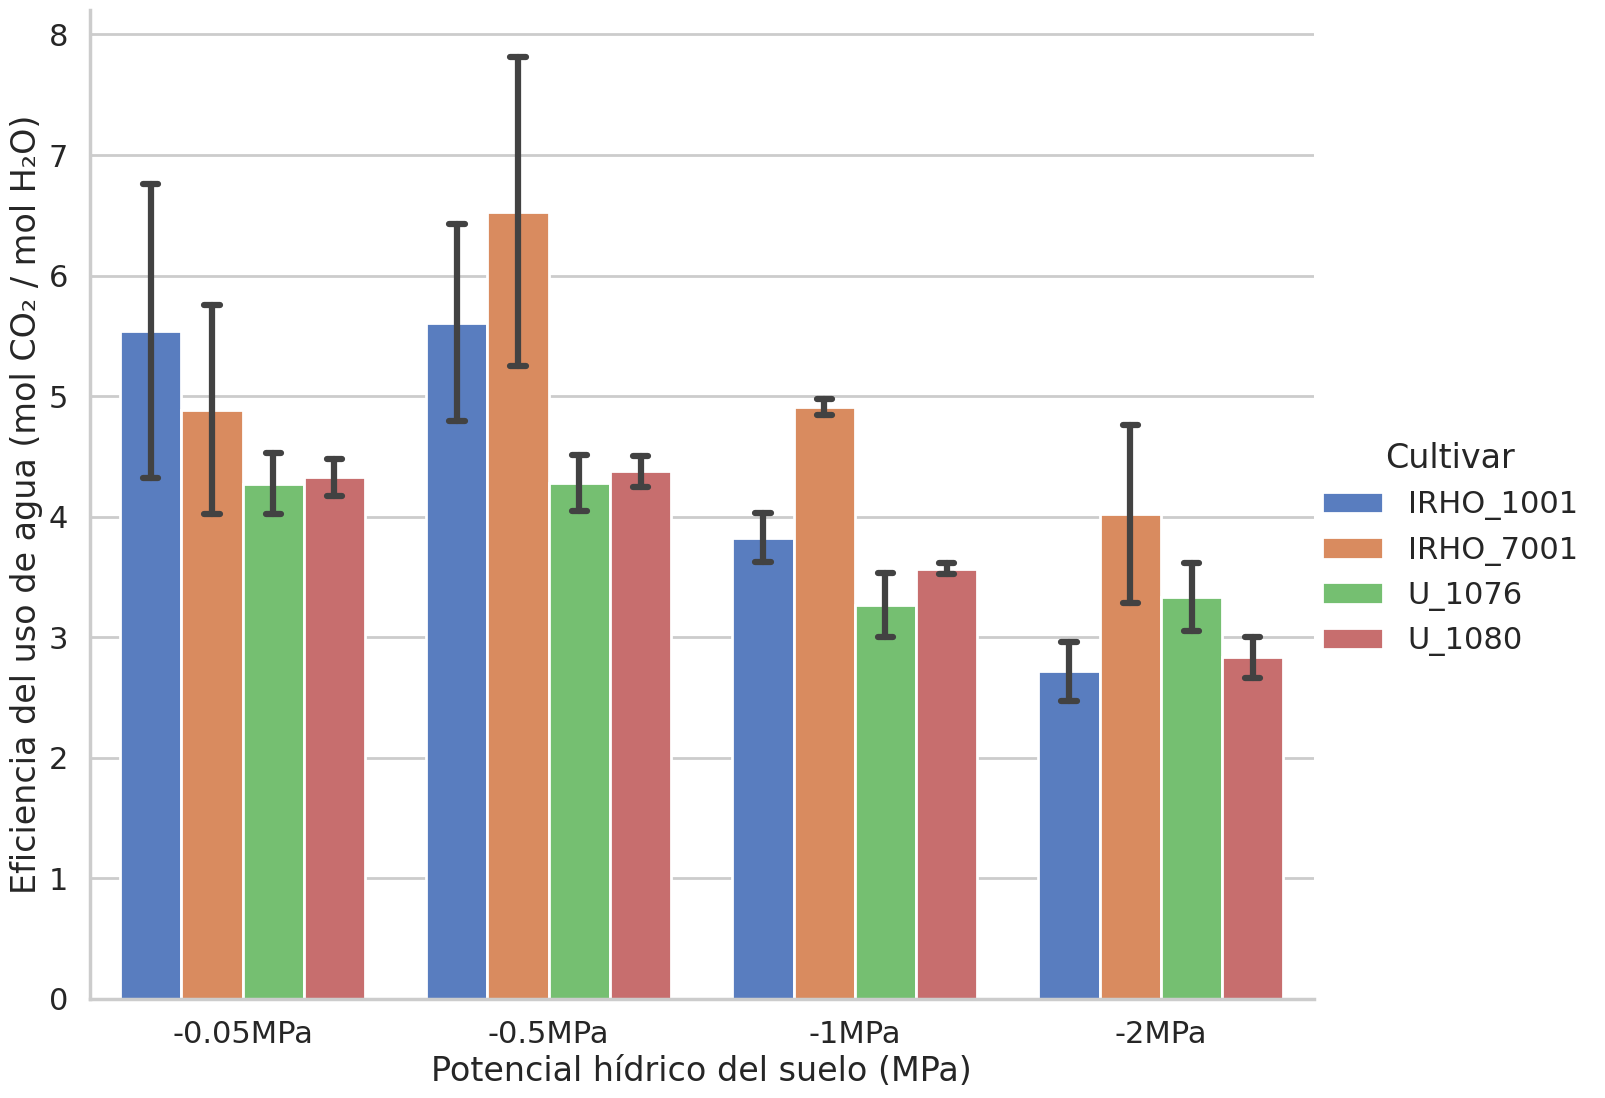

In [151]:
sns.catplot(
    x="WATERPOT",  # x variable name
    y="WUE",  # y variable name
    hue="Cultivar",  # group variable name
    data=raw_df,  # dataframe to plot
    kind="bar",
    errorbar=("sd", 1),
    capsize=0.2,
    palette="muted",
    height=11.5,  # inches
    aspect=1.2,
)

# plt.title("")
plt.xlabel("Potencial hídrico del suelo (MPa)")
plt.ylabel("Eficiencia del uso de agua (mol CO₂ / mol H₂O)")